Autor koda: Šimun Šopar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data
from IPython.display import clear_output

import binlogreg
import logreg
import fcann2


import torch
import torch.nn as nn
import torch.optim as optim

import pt_logreg
import pt_deep
import ksvm_wrap
import torchvision
import mnist_shootout

# Prvi zadatak

In [2]:
np.random.seed(12)

X,Y_ = data.sample_gmm_2d(5, 2, 30)

w, b = binlogreg.binlogreg_train(X, Y_)
clear_output()

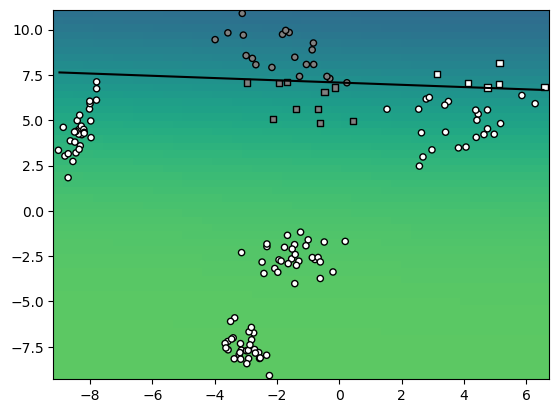

In [3]:
Y = binlogreg.binlogreg_classify(X, w, b)
Y = np.array([1 if y > 0.5 else 0 for y in Y])

rect = ([np.min(X[:,0]), np.min(X[:,1])],[np.max(X[:,0]), np.max(X[:,1])])
data.graph_surface(lambda x: binlogreg.binlogreg_classify(x, w, b), rect, 0.5, 50, 50)
data.graph_data(X, Y_, Y)


# Drugi zadatak

In [4]:
np.random.seed(42)
X, Y_ = data.sample_gmm_2d(6, 2, 10)

W1, b1, W2, b2 = fcann2.fcann2_train(X, Y_, 10, 100)

In [5]:
Y_pred = fcann2.fcann2_classify(X, W1, b1, W2, b2)
Y_pred = np.array([np.argmax(y) for y in Y_pred])

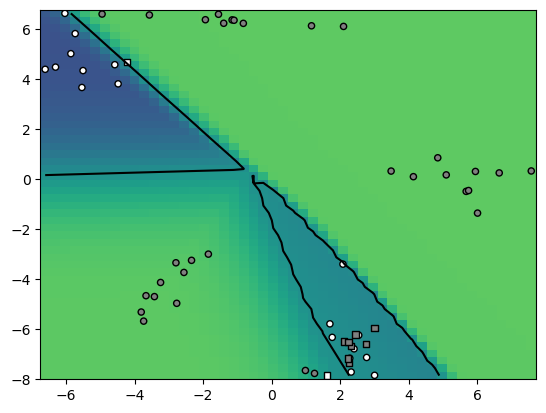

In [6]:
data.graph_surface(lambda x: fcann2.fcann2_classify(x, W1, b1, W2, b2)[:,0], 
                   ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)

col = ['r' if y == 1 else 'y' for y in Y_]

data.graph_data(X, Y_, Y_pred)

# Treći zadatak

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
torch.Tensor([1,2,3])

tensor([1., 2., 3.])

In [7]:
a = torch.randn(1, requires_grad = True)
b = torch.randn(1, requires_grad = True)


realA = 3
realB = 1

#generiranje podataka za fit:
numOfData = 10
xRange = 5
X = torch.rand(numOfData)*xRange
Y = torch.tensor([realA*x + realB + np.random.normal() for x in X])


optimizer = optim.SGD([a,b], lr = 0.1)

for i in range(100):
    Y_ = a*X + b
    
    diff = (Y - Y_)
    
    loss = (diff**2).mean()
    
    loss.backward()
    
    optimizer.step()
    print(f'step: {i}\ngrad a: {a.grad}, grad b: {b.grad}')
    print(f'Analitički gradijenti:\ngrad a:', '{:.4f}'.format(-2*torch.dot(X,diff)/numOfData), 
          'grad b:', '{:.4f}'.format(-2*torch.sum(diff)/numOfData),'\n')
    optimizer.zero_grad()
    
    #print(f'step: {i}, loss: {loss}\nY_: {Y_}\na: {a}, b: {b}\n')
    
#clear_output()

print(f'loss: {loss}\nY: {Y}\nY_: {Y_}\na: {a}, b: {b}\n')



step: 0
grad a: tensor([-46.4005]), grad b: tensor([-17.3408])
Analitički gradijenti:
grad a: -46.4005 grad b: -17.3408 

step: 1
grad a: tensor([11.1617]), grad b: tensor([4.1342])
Analitički gradijenti:
grad a: 11.1617 grad b: 4.1342 

step: 2
grad a: tensor([-2.6706]), grad b: tensor([-1.0242])
Analitički gradijenti:
grad a: -2.6706 grad b: -1.0242 

step: 3
grad a: tensor([0.6526]), grad b: tensor([0.2170])
Analitički gradijenti:
grad a: 0.6526 grad b: 0.2170 

step: 4
grad a: tensor([-0.1466]), grad b: tensor([-0.0796])
Analitički gradijenti:
grad a: -0.1466 grad b: -0.0796 

step: 5
grad a: tensor([0.0449]), grad b: tensor([-0.0068])
Analitički gradijenti:
grad a: 0.0449 grad b: -0.0068 

step: 6
grad a: tensor([-0.0016]), grad b: tensor([-0.0229])
Analitički gradijenti:
grad a: -0.0016 grad b: -0.0229 

step: 7
grad a: tensor([0.0090]), grad b: tensor([-0.0177])
Analitički gradijenti:
grad a: 0.0090 grad b: -0.0177 

step: 8
grad a: tensor([0.0060]), grad b: tensor([-0.0176])
An

# Četvrti zadatak

In [8]:
a = np.array([[1,2],[1,2]])


array([[1, 1],
       [2, 2]])

In [5]:
a = np.array([1,23])
a.shape

(2,)

In [8]:
import pt_logreg

In [8]:
np.random.seed(100)
X, Y_ = data.sample_gauss_2d(2, 300)
ptlog = pt_logreg.PTLogreg(2, 2)
pt_logreg.train(ptlog, torch.Tensor(X), nn.functional.one_hot(torch.Tensor(Y_).to(torch.int64), 2), 500, 0.05, 0)

Y_pred = pt_logreg.eval(ptlog, X)
Y_pred = np.array([np.argmax(y) for y in Y_pred])

w, b = binlogreg.binlogreg_train(X, Y_)
clear_output()
Y_pred2 = binlogreg.binlogreg_classify(X, w, b)
Y_pred2 = [1 if y > 0.5 else 0 for y in Y_pred2]

Text(0.5, 1.0, 'binlogreg')

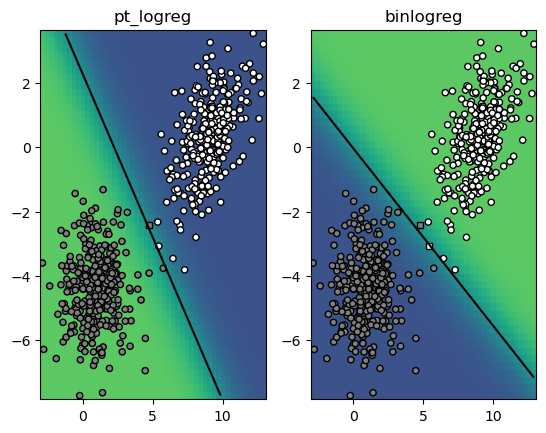

In [9]:
plt.subplot(1, 2, 1)


data.graph_surface(lambda x: pt_logreg.eval(ptlog, x)[:, 0],
                   ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)
data.graph_data(X, Y_, Y_pred)
plt.title('pt_logreg')


plt.subplot(1, 2, 2)

data.graph_surface(lambda x: binlogreg.binlogreg_classify(x, w, b), 
                   ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)
data.graph_data(X, Y_, Y_pred2)
plt.title('binlogreg')

In [10]:
np.random.seed(70)
X, Y_ = data.sample_gauss_2d(3, 20)
ptlog = pt_logreg.PTLogreg(3, 2)
pt_logreg.train(ptlog, torch.Tensor(X), nn.functional.one_hot(torch.Tensor(Y_).to(torch.int64), 3), 300, 0.005, 0)


w, b = logreg.logreg_train(X, Y_, 300, 0.005)
clear_output()

Text(0.5, 1.0, 'logreg')

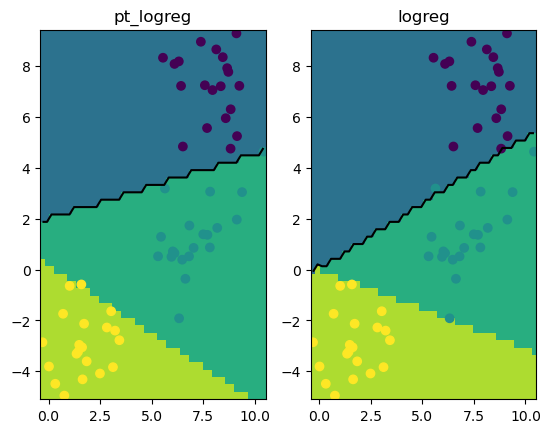

In [11]:
plt.subplot(1, 2, 1)


data.graph_surface(lambda x: np.argmax(pt_logreg.eval(ptlog, x), axis = 1),
                   ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)
plt.scatter(X[:,0], X[:,1], c=Y_)
plt.title('pt_logreg')


plt.subplot(1, 2, 2)

data.graph_surface(lambda x: np.argmax(logreg.logreg_classify(x, w, b),axis = 1), 
                   ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)
plt.scatter(X[:,0], X[:,1], c = Y_)
plt.title('logreg')

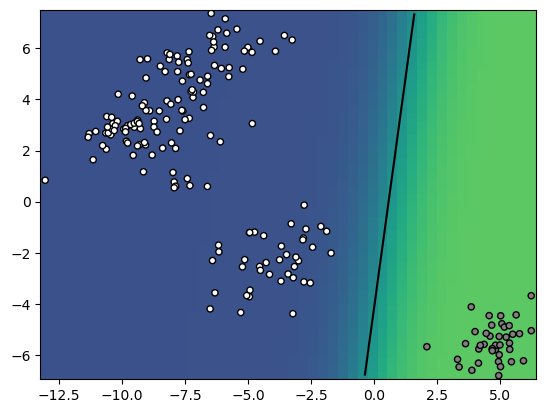

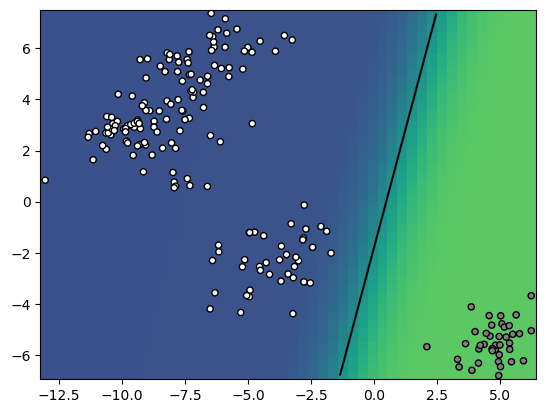

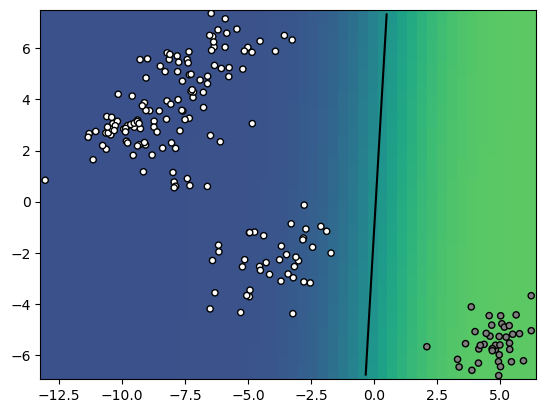

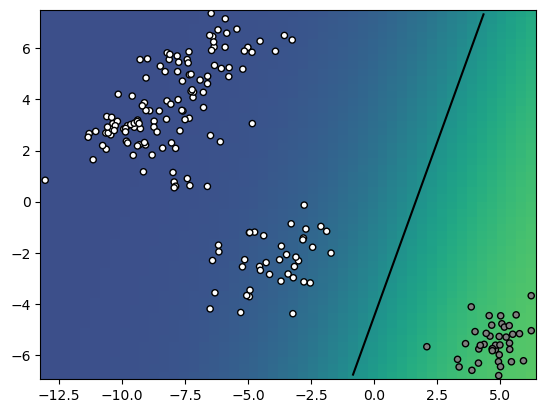

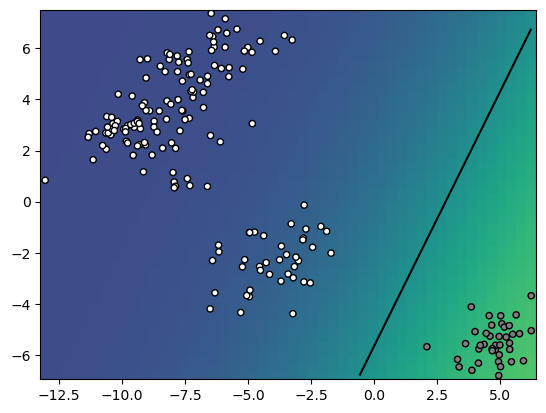

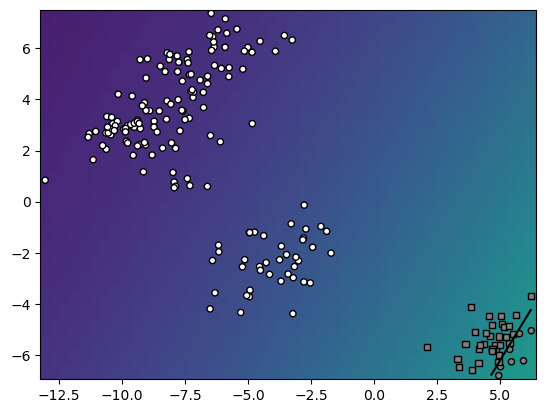

In [12]:
lambda_mesh = [0, 0.005, 0.05, 0.5, 1, 10]

np.random.seed(90)
X, Y_ = data.sample_gmm_2d(5, 2, 40)


for i,l in enumerate(lambda_mesh):
    ptlog = pt_logreg.PTLogreg(2, 2)
    pt_logreg.train(ptlog, torch.Tensor(X), nn.functional.one_hot(torch.Tensor(Y_).to(torch.int64), 2), 500, 0.05, l)

    Y_pred = pt_logreg.eval(ptlog, X)
    Y_pred = np.array([np.argmax(y) for y in Y_pred])
    
    data.graph_surface(lambda x: pt_logreg.eval(ptlog, x)[:, 0],
                       ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)
    data.graph_data(X, Y_, Y_pred)
    plt.show()

# Peti zadatak

In [6]:
import pt_deep

In [13]:
np.random.seed(100)
#X, Y = data.sample_gauss_2d(2, 300)
X, Y_ = data.sample_gmm_2d(5, 2, 50)
layers = [2, 10, 2]
ptDeep = pt_deep.PTDeep(layers, torch.relu)

pt_deep.train(ptDeep, torch.Tensor(X), nn.functional.one_hot(torch.Tensor(Y_).to(torch.int64), 2), 200, 0.001, 0)

Y_pred = pt_deep.eval(ptDeep, X)
Y_pred = np.array([np.argmax(y) for y in Y_pred])

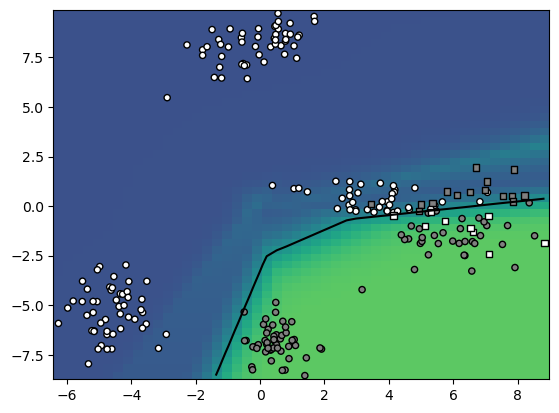

In [14]:
data.graph_surface(lambda x: pt_deep.eval(ptDeep, x)[:, 0], 
                   ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)

data.graph_data(X, Y_, Y_pred)

In [15]:
pt_deep.count_params(ptDeep)

weights.0: je tensor tipa [10, 2]
weights.1: je tensor tipa [2, 10]
biases.0: je tensor tipa [10]
biases.1: je tensor tipa [2]
Ukupno parametara: 52


In [17]:
data.eval_perf_binary(Y_, Y_pred)

[0.904, 0.94, 0.9038461538461539]

# Šesti zadatak

In [7]:
import ksvm_wrap

In [18]:
np.random.seed(100)
#X, Y_ = data.sample_gauss_2d(2, 300)
X, Y_ = data.sample_gmm_2d(5, 2, 50)
clf = ksvm_wrap.KSVMWrap(X, Y_, param_svm_gamma = 0.001)
supp = clf.support()

ptdeep = pt_deep.PTDeep([2,10,2], torch.relu)
pt_deep.train(ptdeep, torch.Tensor(X), nn.functional.one_hot(torch.Tensor(Y_).to(torch.int64), 2), 100, 0.005, 0)

Y_pred = pt_deep.eval(ptdeep, X)
Y_pred = np.array([np.argmax(y) for y in Y_pred])

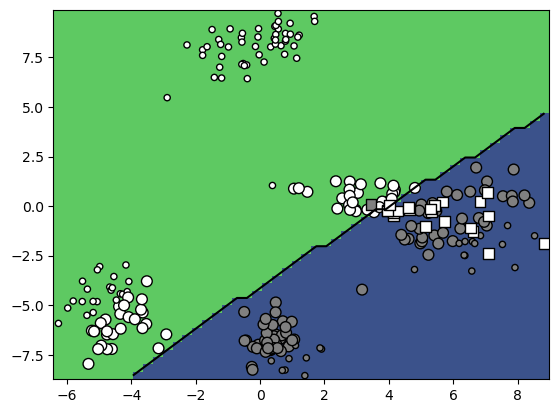

[0.912, 0.86, 0.9923076923076923]


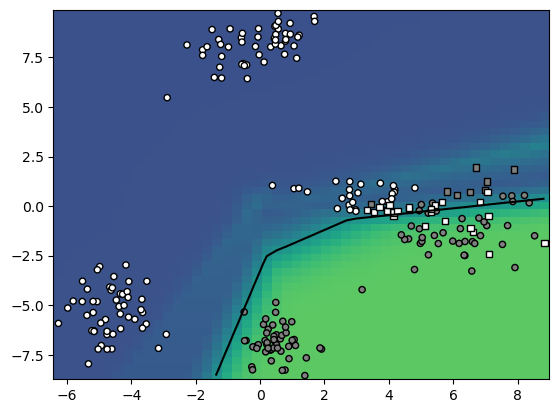

[0.872, 0.84, 0.9402985074626866]


In [19]:
data.graph_surface(lambda x: clf.predict(x), 
                   ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)

data.graph_data(X, Y_, clf.predict(X), supp)
plt.show()
print(data.eval_perf_binary(Y_, clf.predict(X)))

data.graph_surface(lambda x: pt_deep.eval(ptDeep, x)[:, 0], 
                   ([np.min(X[:,0]), np.min(X[:,1])], [np.max(X[:,0]), np.max(X[:,1])]), 0.5, 50, 50)

data.graph_data(X, Y_, Y_pred)
plt.show()
print(data.eval_perf_binary(Y_, Y_pred))

# Sedmi zadatak

In [ ]:
import torchvision
import mnist_shootout

In [21]:
dataset_root = 'C:/Users/Šimun/python workspace/Duboko učenje 1/LAB1/MNIST data'  # change this to your preference
mnist_train = torchvision.datasets.MNIST(dataset_root, train=True, download=False)
mnist_test = torchvision.datasets.MNIST(dataset_root, train=False, download=False)

x_train, y_train = mnist_train.data, mnist_train.targets
x_test, y_test = mnist_test.data, mnist_test.targets
x_train, x_test = x_train.float().div_(255.0), x_test.float().div_(255.0)

In [22]:
layers = [784, 10]
model = pt_deep.PTDeep(layers, torch.relu)

epoches = 10
epochSize = 30
L = []

for i in range(epoches):
    L_ = pt_deep.train(model, torch.flatten(x_train, start_dim = 1), nn.functional.one_hot(y_train, 10), epochSize, 0.1, saveLoss = True)
    print('Epoch =', i)
    L.append(L_)

clear_output()
    
for i in range(0, len(list(model.named_parameters())), 2):
    print(list(model.named_parameters())[i])
    
    

('weights.0', Parameter containing:
tensor([[ 1.3706e+00,  4.9071e-01, -1.6820e-01,  ..., -6.8907e-01,
          1.4479e+00, -1.5967e+00],
        [ 9.1222e-01, -8.2613e-01, -1.1275e+00,  ..., -5.7157e-01,
         -1.5529e-04,  1.1526e+00],
        [-4.2807e-01,  6.0448e-01,  1.4217e+00,  ..., -6.7107e-01,
          7.3822e-01, -7.6384e-01],
        ...,
        [-5.9530e-01,  7.5289e-01,  1.4049e-01,  ..., -1.3942e+00,
          3.6022e-01, -3.5932e-01],
        [-1.2242e+00, -7.5512e-01, -1.7276e-01,  ...,  8.7291e-01,
         -1.4327e+00,  1.6496e+00],
        [-5.0874e-01,  1.9699e+00,  8.1107e-01,  ...,  1.1490e+00,
         -1.7392e+00, -3.9012e-02]], requires_grad=True))


In [23]:
#provjera na nekoliko testnih znamenaka
for i in range(0, 10):
    print(y_test[i], np.argmax(pt_deep.eval(model, torch.reshape(x_test[i], (1, 28*28)).numpy()), axis = 1))


tensor(7) [7]
tensor(2) [6]
tensor(1) [1]
tensor(0) [0]
tensor(4) [4]
tensor(1) [1]
tensor(4) [4]
tensor(9) [6]
tensor(5) [2]
tensor(9) [7]


In [24]:
y_pred = pt_deep.eval(model, torch.flatten(x_test, start_dim = 1))
y_pred = np.argmax(y_pred, axis = 1)

P1, O1 = mnist_shootout.acc(y_test, y_pred)
print(P1, O1)

[0.7626262626262627, 0.8400342172797263, 0.6526418786692759, 0.6705426356589147, 0.657, 0.48679678530424797, 0.7631578947368421, 0.7302564102564103, 0.5109004739336492, 0.5215605749486653, 0.6632] [0.7704081632653061, 0.8651982378854626, 0.6463178294573644, 0.6851485148514852, 0.6690427698574338, 0.47533632286995514, 0.7265135699373695, 0.6926070038910506, 0.553388090349076, 0.5034687809712587, 0.6632]


In [12]:
#podjela na validaciju i test

indexes = [i for i in range(len(y_test))]
np.random.shuffle(indexes)

index_test = indexes[0:(int)(len(y_test)*4/5)]
index_val = indexes[(int)(len(y_test)*4/5):]

x_val = x_test[index_val]
y_val = y_test[index_val]
x_test_2 = x_test[index_test]
y_test_2 = y_test[index_test]

In [13]:
from sklearn import svm
clf1 = svm.SVC(decision_function_shape='ovo')
clf2 = svm.SVC(kernel='linear', decision_function_shape='ovo')

clf1.fit(torch.flatten(x_test[0:300], start_dim = 1).numpy(), y_test[0:300].numpy())
clf1.predict(torch.flatten(x_test[300:400], start_dim = 1).numpy())

clf2.fit(torch.flatten(x_test[0:300], start_dim = 1).numpy(), y_test[0:300].numpy())
clf2.predict(torch.flatten(x_test[300:400], start_dim = 1).numpy())


array([5, 7, 1, 2, 7, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 8, 6, 6, 0, 5, 7, 7,
       9, 3, 5, 4, 2, 0, 7, 1, 1, 2, 1, 5, 3, 3, 9, 7, 0, 6, 3, 4, 1, 3,
       8, 1, 0, 5, 1, 7, 1, 5, 0, 6, 2, 8, 5, 1, 7, 9, 4, 6, 7, 2, 5, 0,
       6, 5, 6, 3, 7, 2, 0, 8, 9, 5, 4, 1, 1, 4, 0, 7, 3, 7, 6, 1, 6, 2,
       1, 7, 2, 8, 6, 1, 9, 5, 2, 5, 4, 4], dtype=int64)

In [34]:
model = pt_deep.PTDeep(layers, torch.relu)

mnist_shootout.train_7(model, torch.flatten(x_test, start_dim = 1), nn.functional.one_hot(y_test, 10), 80, 0.1)
#mnist_shootout.train_7(model, torch.flatten(x_test, start_dim = 1), nn.functional.one_hot(y_test, 10), 100, 0.01, variable = True)

In [35]:
np.argmax(pt_deep.eval(model, torch.flatten(x_train[0:10], start_dim = 1).numpy()), axis = 1)

array([5, 0, 2, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

In [36]:
y_train[0:10]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])

In [42]:
#neuralna mreža koja nema problema sa softmaxom!
class PTDeep2(nn.Module):
    def __init__(self, layers, activation_fun):
        super().__init__()
        self.layers = layers    
        self.weights = nn.ParameterList([nn.Parameter(
            torch.normal(torch.zeros(self.layers[i], self.layers[i-1]), torch.ones(self.layers[i], self.layers[i-1])))
                                         for i in range(1, len(self.layers))])
        self.biases = nn.ParameterList([nn.Parameter(
            torch.normal(torch.zeros(self.layers[i]), torch.ones(self.layers[i])))
                                        for i in range(1, len(self.layers))])
        
        self.activation_fun = activation_fun
        
    def forward(self, X):
        H = X
        
        for i in range(0, len(self.biases)-1):
            H = torch.mm(H, (self.weights[i]).T) + self.biases[i]
            H = self.activation_fun(H)
            
        H = torch.mm(H, (self.weights[len(self.biases)-1]).T) + self.biases[len(self.biases)-1]
        sftm = nn.Softmax(dim = 1)
        return H
        
    
    def get_loss(self, X, Yoh_, param_lambda = 0.001):
        P = self.forward(X)
        
        w_vec = torch.Tensor([])
        for i in range(1, len(self.biases)):
            w_vec = torch.cat( ( w_vec, torch.reshape( self.weights[i], (-1,) ) ) )
            
        return torch.mean( torch.max(P, axis = 1)[0]  - torch.sum(P * Yoh_, axis = 1)   ) + param_lambda * torch.norm(w_vec)**2
    



In [47]:
model = PTDeep2([28*28, 10], torch.relu)

epoches = 10
epochSize = 10
L = []

for i in range(epoches):
    L_ = pt_deep.train(model, torch.flatten(x_train, start_dim = 1), nn.functional.one_hot(y_train, 10), epochSize, 0.1, saveLoss = True)
    print('Epoch =', i)
    L.append(L_)

clear_output()

In [49]:
np.argmax(pt_deep.eval(model, torch.flatten(x_test[0:10], start_dim = 1).numpy()), axis = 1)

array([7, 2, 1, 0, 5, 1, 4, 6, 2, 9], dtype=int64)

In [50]:
y_test[0:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])